In [1]:
#Import the data.
#Import the required libraries

import pandas as pd
import os.path as osp
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_path = osp.join(osp.curdir,'byYEAR,hood,AUTOTHEFT.csv')
data = pd.read_csv(data_path)
data

,Number_Of_Crime,OCC_YEAR,Neighbourhood_Name,Neighbourhood_Number,Total_Age_groups_of_the_population,Married_CommonLaw_Rate,Education_Rate,Employment_rate,Average_age,Average_total_income_in_2020
0,85,2019,Milliken,130,23980,48.519600,20.454545,41.5,44.9,36800
1,40,2019,Woburn North,142,26580,44.018059,29.063205,50.5,40.1,40000
2,31,2019,Forest Hill North,102,12290,44.995932,44.304312,60.5,42.3,89700
3,91,2019,Oakdale-Beverley Heights,154,21420,38.608777,12.675070,50.8,39.8,41160
4,36,2019,Rockcliffe-Smythe,111,22235,40.746571,15.988307,48.8,42.2,43840
...,...,...,...,...,...,...,...,...,...,...
785,18,2023,North Toronto,173,15885,42.052251,54.548316,65.0,39.2,58100
786,17,2023,Broadview North,57,10955,41.853035,32.496577,56.1,42.6,54050
787,30,2023,Old East York,58,9160,47.379913,31.168122,56.3,43.0,63800
788,21,2023,South Eglinton-Davisville,174,22735,44.336925,58.324170,65.6,40.1,69000


In [2]:
#Build our model using statsmodels
model = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + Education_Rate + Employment_rate + Average_age + Average_total_income_in_2020',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     48.42
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.38e-57
Time:                        23:29:42   Log-Likelihood:                -4214.9
No. Observations:                 790   AIC:                             8446.
Df Residuals:                     782   BIC:                             8483.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [3]:
# R-squqared: 0.302
# P value for F-test: 3.38e-57 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.119
# Education_Rate: 0.000
# Employment_rate: 0.178      
# Average_age:  0.927
# Average_total_income_in_2020: 0.000

# employment rate and average age insignificant

# final model after dropping variable

In [4]:
#new model
temp_model = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + Education_Rate + Average_total_income_in_2020',data).fit()
print(temp_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     67.22
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.79e-58
Time:                        23:29:45   Log-Likelihood:                -4216.2
No. Observations:                 790   AIC:                             8444.
Df Residuals:                     784   BIC:                             8472.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [5]:
# R-squqared: 0.300
# P value for F-test: 1.79e-58 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.098
# Education_Rate: 0.000
# Average_total_income_in_2020: 0.000

# married/commonlaw rate insignificant

In [6]:
autotheft_model = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Education_Rate + \
Average_total_income_in_2020',data).fit()
print(autotheft_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     83.15
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           7.17e-59
Time:                        23:29:46   Log-Likelihood:                -4217.6
No. Observations:                 790   AIC:                             8445.
Df Residuals:                     785   BIC:                             8468.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [7]:
# R-squqared: 0.298
# P value for F-test: 7.17e-59 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Education_Rate: 0.000
# Average_total_income_in_2020: 0.000

# all variables significant

'''
This is final model
'''

'\nThis is final model\n'

# Graph/plots

In [8]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

train_X = data[['OCC_YEAR', 'Total_Age_groups_of_the_population', 'Education_Rate', 'Average_total_income_in_2020']].values
train_y = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

reg = LinearRegression().fit(train_X, train_y)

### Residual vs Fitted value 

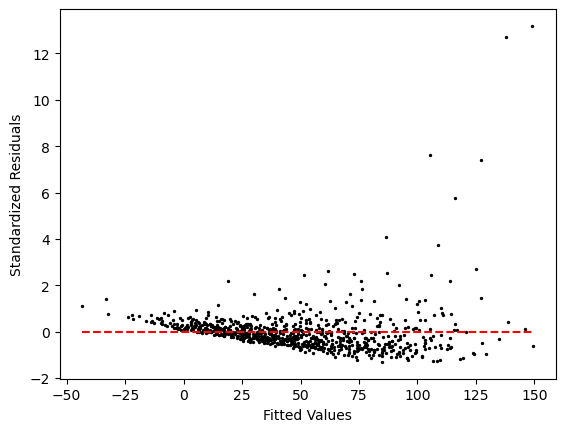

Mean of Residuals: -1.3999310852606085e-12


In [9]:
### Residual vs Fitted value - check for patterns and distribution of points around 0 on the y-axis


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(reg.predict(train_X),norm_residuals,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',residuals.mean())


In [10]:
# the Residual vs Fitted values graph is cone-shaped
# the Mean of Residuals: -1.3999310852606085e-12

## You can see here that as the predicted value of Y increases, the variance of the residual also increases. 
## By producing a ‘residuals by regressor’ plot by you can gain more insight into where the heteroskedasticity originates.

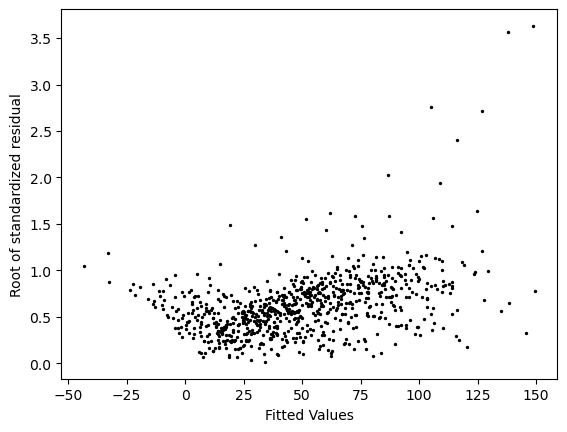

In [11]:
### Scale-location plot - check for assumptions of homoscedasticity

# this is cone shaped:  this implies that there is heteroskedasticity 

from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

In [12]:
# Breuch-Pagan Test for heteroskedasticity 

#Import the relevant libraries and train the model
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(autotheft_model.resid,autotheft_model.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 36.79122353560424, 'LM-Test p-value': 1.9887985766733885e-07, 'F-Statistic': 9.58602427968872, 'F-Test p-value': 1.4313266300494025e-07}


In [13]:
# The results of the Breusch-Pagan test will be a tuple of 4 values. 
# The ones we are concerned about are the p-values. 

# 'LM-Test p-value': 1.9887985766733885e-07
# 'F-Test p-value': 1.4313266300494025e-07

# They are both less than 0.05, the model is found to be heteroskedastic.

In [14]:
# Applying HCCME to correct the inteference in the regression 
# Used HC2 when data has greater than 250 observations.

corrected_model = autotheft_model.get_robustcov_results(cov_type = 'HC2')
print(corrected_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     30.46
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.36e-23
Time:                        23:29:48   Log-Likelihood:                -4217.6
No. Observations:                 790   AIC:                             8445.
Df Residuals:                     785   BIC:                             8468.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [15]:
# R-squqared: 0.298
# P value for F-test: 3.35e-16 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Education_Rate: 0.000
# Average_total_income_in_2020: 0.000



# Normal QQ plot

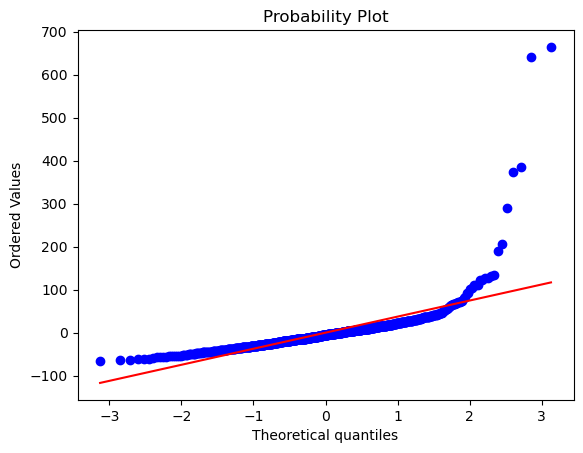

In [16]:
#Normal QQ plot

import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

# Influence plot

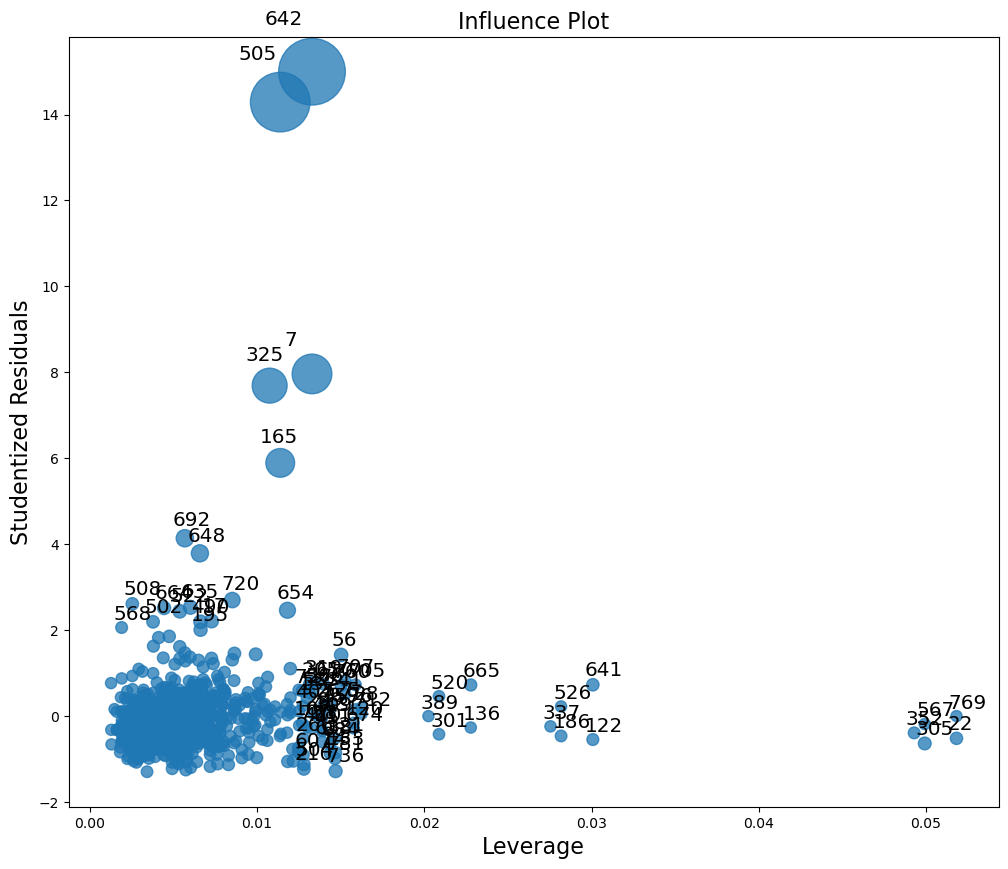

In [17]:
#Residuals vs Leverage
fig, ax = plt.subplots(figsize=(12,10))
fig = sm.graphics.influence_plot(autotheft_model, ax=ax, criterion="cooks")
plt.show()

# Density plot

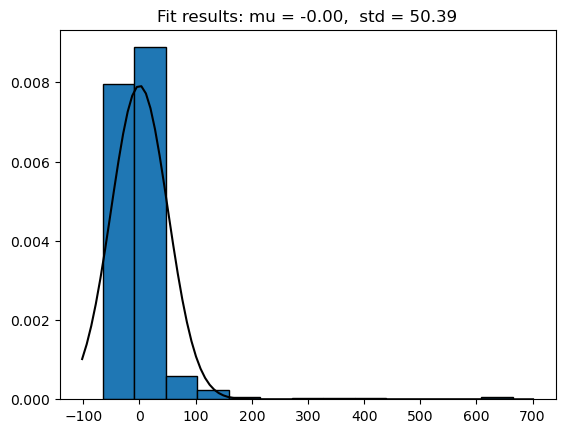

In [18]:
# density plot - to check for normality of errors

# this shows that there is normality issues as plot is not a normal distribution

from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

# Prediction number for crimes


In [19]:
#train_X = data[['OCC_YEAR', Total_Age_groups_of_the_population', 'Education_Rate', 'Average_total_income_in_2020']].values
#train_y = data['Number_Of_Crime'].values
#reg = LinearRegression().fit(train_X, train_y)

# USE AVERAGE of each column
from statistics import mean
reg.predict(np.array([2024, mean(data['Total_Age_groups_of_the_population']), mean(data['Education_Rate']), \
                      mean(data['Average_total_income_in_2020'])]).reshape(1,-1))[0]

82.22911392404785